# Simone Flowers

## Research Question: Is there a correlation between age of an employee in the Tech work industry and them seeking treatment for their mental health issues

This day and age, mental health isn't as stigmatized against as it once was in the past. People are generally more willing to seek treatment for mental health issues, because these issues are now perceived as similar or the same as physical health issues. That being said, it is expected that more of the younger generations, Millennials and Gen Z, are more welcoming of treatments for mental health problems than older generations, Gen X and Boomers. What I want to explore is if this holds true in the tech industry. In the Mental Health in Tech survey data-frame, everyone who participated entered their age, whether they have sought out treatment for their mental health, and whether they are willing to talk about mental health issues with their supervisor and/or coworkers. Using this data, I will see if there is any correlation between age of the employee, and willingness to discuss mental health issues.

In [1]:
# importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Milestone 2
## Task 4: Loading in raw dataset

In [2]:
rawDF = pd.read_csv('../data/raw/dataRaw.csv')

---

# Milestone 3

## Task 1: Conduct an EDA on dataset

Looking at shapes and general trends in the data

In [4]:
rawDF.shape

(1259, 27)

In [5]:
rawDF.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
rawDF.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

There's a lot of data in this dataset, with a lot of different answers. Almost all of those answers are not numerical, so it doesn't seem like I'll be able to do a lot of analysis based on statistics on. I don't think the comments column will be very helpful as there are so many different answers to it. Timestamp will also be unnecessary since we know that the survey was conducted in 2014 and 2016. I will also probably not use a majority of these columns as most of them (ie. 'Gender', 'state', 'country', etc.) don't pertain to my research question.

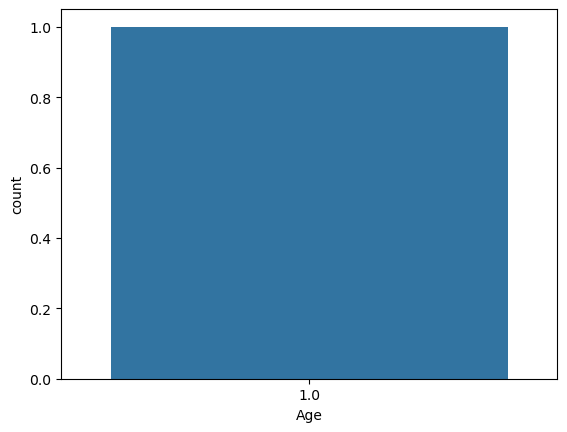

In [7]:
raw_data_mx = rawDF.corr()
sns.countplot(raw_data_mx, x='Age')
plt.show()

Yeah, it looks like I won't be able to get a lot out of the data without wrangling the data and focusing on the specific columns that I want.

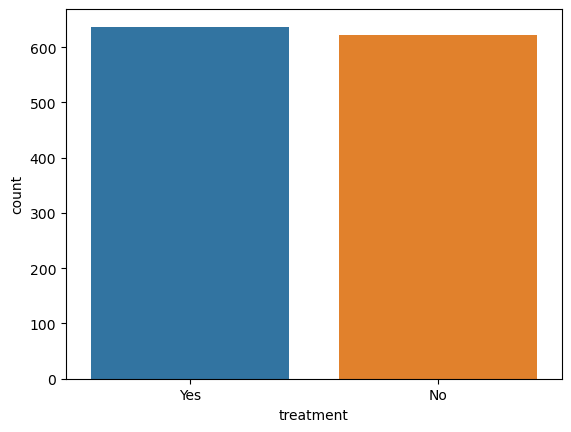

In [8]:
sns.countplot(x='treatment', data=rawDF)
plt.show()

## Task 2: Data Analysis Pipeline

I need to create a new dataframe using only the columns that I need for my research question.

In [7]:
# #Takes only a few columns from the raw data and makes it into a new file
newdf = rawDF[['Age', 'treatment', 'supervisor', 'coworkers']]

# #Get a list of all the age values in the dataframe 
agedf = rawDF[['Age']]
# Find the max age
age_max = agedf.max(axis=0)
# Find the min age
age_min = agedf.min(axis=0)

# #Find incompatible age values and remove those rows
# Find all ages above 100
filtered_high_df = newdf[newdf['Age'] >= 100].index
# Find all ages below 18
filtered_low_df = newdf[newdf['Age'] <= 18].index
# Drop rows with too high index
newdf.drop(filtered_high_df,inplace=True)
# Drop rows with too low index
newdf.drop(filtered_low_df,inplace=True)

#Save the new dataframe to a csv file
newdf.to_csv('../data/processed/sflowersResearchQuestionData.csv',index=False)

C:\Users\simfl\AppData\Local\Temp\ipykernel_13524\3013711405.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.drop(filtered_high_df,inplace=True)
C:\Users\simfl\AppData\Local\Temp\ipykernel_13524\3013711405.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.drop(filtered_low_df,inplace=True)


## Task 3: Method Chaining

In [11]:
import project_functions1 as p1

load_df = pd.read_csv('../data/raw/dataRaw.csv')
proj_df = p1.load_and_process(load_df)
proj_df.head()


,Age,treatment,coworkers,supervisor
0,37,Yes,Some of them,Yes
1,44,No,No,No
2,32,No,Yes,Yes
3,31,Yes,Some of them,No
4,31,No,Some of them,Yes


In [10]:
proj_df = (rawDF[rawDF[['Age', 'treatment', 'supervisor', 'coworkers']]].drop(filtered_high_df, filtered_low_df, inplace=True))

ValueError: Boolean array expected for the condition, not int64

## Task 4: Data Analysis
Now that I have the dataframe set up in a way that best pertains to my research question, I would like to add a column that labels the tech workers based on their age. This way I can really analyze whether age of the tech worker affects their willingness to discuss mental health. The age groups I'm separating them into can be seen below, along with a link leading to the website I got my information from. (Note: I am not including the Xennials row because there is overlap between GenX and Millennial)

[Table of Generations](https://www.careerplanner.com/Career-Articles/Generations.cfm)

- Boomer: 52 and higher
- Gen X: 37 - 51
- Millennial: 20 - 36
- Gen Z/Zoomer: 19 and lower

In [ ]:
load_df = pd.read_csv('../data/raw/dataRaw.csv')
proj_df = p1.load_and_process(load_df)

#creating a new column that labels the age generation of the tech worker
def label_age (row):
   """Takes the number in the Age column, and if that age is in a certain range, what is returned in the new column is the name of that generation."""
   if row['Age'] >= 52:
      return 'Boomer'
   if row['Age'] >= 37 and row['Age'] <= 51:
      return 'Gen X'
   if row['Age'] >= 20 and row['Age'] <= 36:
      return 'Millennial'
   if row['Age'] <= 19:
      return 'Gen Z'

proj_df['age_label'] = proj_df.apply(lambda row: label_age(row), axis=1)

proj_df.head(5)

In [ ]:
hue_order = ['Boomer', 'Gen X', 'Millennial', 'Gen Z']

sns.countplot(x='treatment', data=proj_df, hue='age_label', hue_order=hue_order).set(title='Willingness for Mental Health Treatment based on Age Group')
plt.show()

Figure 1: In the above countplot, it shows the willingness of tech workers to get treatment for their mental health issues, divided by their age class. Both Boomers and Gen X employees are more likely to get treatment for their mental health than Millennials and Gen Z employees.

In [ ]:
sns.countplot(x='supervisor', data=proj_df, hue='age_label', hue_order=hue_order).set(title='Willingness to Discuss Mental Health with Supervisor based on Age Group')
plt.show()

Figure 2: The above countplot reveals a tech worker's willingness to discuss mental health issues with their supervisors, separated by age generations. Boomers, Gen X, and Millennials answered 'Yes' more than the other answers, while Gen Z answered 'No' more times than the other answers.

In [ ]:
orderedList = list(proj_df['coworkers'].sort_values().unique())
orderedList.remove('Yes')
orderedList.insert(0,'Yes')
sns.countplot(x='coworkers', data=proj_df, hue='age_label', hue_order=hue_order, order=orderedList).set(title='Willingness to Discuss Mental Health with Coworkers based on Age Group')
plt.show()

Figure 3: The above countplot illustrates a tech worker's willingness to discuss mental health issues with their coworkers, separated by age generations. What is shown is that all age generations answered 'Some of them' the most, and 'Yes' the least.

#### Conclusion

Overall, it seems that there is no significant correlation between the age of a tech worker and their willingness to seek treatment for or discuss mental health issues. In fact, it seems that Boomers and Gen X workers are more likely to seek treatment than Millennials and Gen Z which contradicts my expectations. Gen Z workers also appear less likely to discuss mental health issues with their supervisor than other generations. While this may be a trend for Gen Z tech employees, it may also be a result of not having enough Gen Z tech workers answer the survey. The same can be said for Boomer workers. Overall, this was an enlightening analysis showing that while the survey was conducted, there is no evidence that older generations are more stigmatized against mental health issues than younger generations.